In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from distutils.version import LooseVersion

#To check recent matplotlib compatibility (Chp2, pg32; Chp3, pg56)
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')

In [95]:
#importing training data to pandas dataframe
df=pd.read_csv('cs-training.csv')

dfy=df.iloc[:,1:2] 
df=df.iloc[:,2:] 
df.head(10)

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [96]:
#Fill-in the missing values (nan) with the column means.
df.fillna(df.mean(),inplace=True)


In [97]:
#Standardizing the data. (Chp4, pg123)
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(df)

y_train=dfy.iloc[:, 0].values

In [98]:
#Check the shape of array
print(X_train_std.shape)
print(y_train.shape)

(150000, 10)
(150000,)


In [99]:
#Find the 2 most important features using LogisticRegression with L1 penalty. (Adjust C until you see 2 features) (Chp 4, pg 127)
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=5e-4, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)
np.set_printoptions(8)
print(lr.intercept_)
print(lr.coef_[lr.coef_!=0].shape)
print(lr.coef_)

[-2.46313946]
(2,)
[[ 0.         -0.20220752  0.09573987  0.          0.          0.
   0.          0.          0.          0.        ]]


In [ ]:
#plot the changing C values to the weight (Chp 4)

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

fig = plt.figure()
ax = plt.subplot(111)

  
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 3.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', 
                            multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[0]) 
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df.columns[column], 
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-4), 10**(3)])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
#plt.savefig('images/plot_C1.png', dpi=300,bbox_inches='tight', pad_inches=0.2)
plt.show()

In [100]:
#corresponding features are age and NumberOfTime30-59DaysPastDueNotWorse
#Then only choose these two features from training data set
#Training a perceptron by splitting data (Chp 3, pg 53)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,1:3], y_train, test_size=0.3, random_state=1, stratify=y_train)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4084\1284966094.py:31: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


IndexError: index 151000 is out of bounds for axis 0 with size 150000

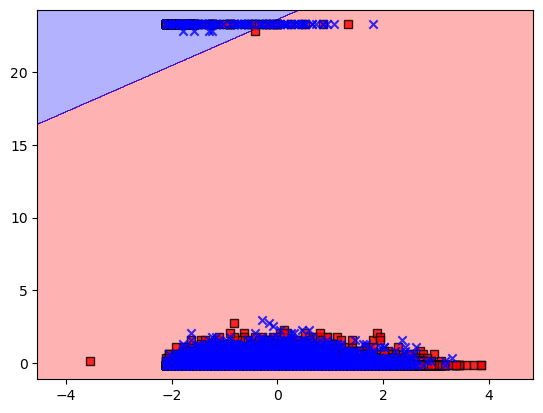

In [101]:
from sklearn.linear_model import LogisticRegression
cval=1e-4
lr = LogisticRegression(C=cval, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr,test_idx=range(151000,152000))
plt.xlabel('age [standardized]')
plt.ylabel('NumberOfTime30-59Days [standardized]')
plt.legend(loc='upper left')
#plt.tight_layout()
plt.title('C='+str(cval))
#plt.savefig('images/lr01.png', dpi=300)
plt.show()

score = lr.score(X_test, y_test)
print(score)

In [102]:
#Logistic regression (Chp3, pg71)
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

lr = LogisticRegression(C=5e-4, random_state=1)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=lr,test_idx=range(151000,152000))

plt.xlabel('age [standardized]')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorseh [standardized]')
plt.legend(loc='upper left')
plt.show()

score = lr.score(X_test, y_test)
print(score)

TypeError: plot_decision_regions() got an unexpected keyword argument 'classifier'

In [103]:
#SVM (Chp3, pg86)
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=5e-4)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('age [standardized]')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorseh [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_15.png', dpi=300)
plt.show()
score = svm.score(X_test, y_test)
score

TypeError: plot_decision_regions() got an unexpected keyword argument 'classifier'

In [104]:
#Decision Tree (Chp3, pg94)
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=100, 
                                    random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_model, test_idx=range(105, 150))

plt.xlabel('age')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

score = tree_model.score(X_test, y_test)
score

TypeError: plot_decision_regions() got an unexpected keyword argument 'classifier'